In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [3]:
# Set the file path for the specific datafile
file_path = 'plant_health_data.csv'

# Import the dataset from kaggle
df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,'ziya07/plant-health-data', file_path)

df.to_csv('plant_health_data.csv')

In [4]:
# View the column names
print(df.columns)

Index(['Timestamp', 'Plant_ID', 'Soil_Moisture', 'Ambient_Temperature',
       'Soil_Temperature', 'Humidity', 'Light_Intensity', 'Soil_pH',
       'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level',
       'Chlorophyll_Content', 'Electrochemical_Signal', 'Plant_Health_Status'],
      dtype='object')


In [5]:
# View the first five lines of the dataset
df.columns = df.columns.str.lower()
df.head()

timestamp  plant_id  soil_moisture  ambient_temperature  \
0  2024-10-03 10:54:53.407995         1      27.521109            22.240245   
1  2024-10-03 16:54:53.407995         1      14.835566            21.706763   
2  2024-10-03 22:54:53.407995         1      17.086362            21.180946   
3  2024-10-04 04:54:53.407995         1      15.336156            22.593302   
4  2024-10-04 10:54:53.407995         1      39.822216            28.929001   

   soil_temperature   humidity  light_intensity   soil_ph  nitrogen_level  \
0         21.900435  55.291904       556.172805  5.581955       10.003650   
1         18.680892  63.949181       596.136721  7.135705       30.712562   
2         15.392939  67.837956       591.124627  5.656852       29.337002   
3         22.778394  58.190811       241.412476  5.584523       16.966621   
4         18.100937  63.772036       444.493830  5.919707       10.944961   

   phosphorus_level  potassium_level  chlorophyll_content  \
0         45.806852        39.076199            35.703006   
1         25.394393        17.944826            27.993296   
2         27.573892        35.706530            43.646308   
3         26.180705        26.257746            37.838095   
4         37.898907        37.654483            48.265812   

   electrochemical_signal plant_health_status  
0                0.941402         High Stress  
1                0.164899         High Stress  
2                1.081728         High Stress  
3                1.186088         High Stress  
4                1.609805         High Stress

In [6]:
df['plant_id']

0        1
1        1
2        1
3        1
4        1
        ..
1195    10
1196    10
1197    10
1198    10
1199    10
Name: plant_id, Length: 1200, dtype: int64

In [36]:
# Create a categorical hierarchy for the plant_health_status
order = ['Healthy', 'Moderate Stress', 'High Stress']
cat_type = pd.CategoricalDtype(categories=order, ordered=True)
df['plant_health_status'] = df['plant_health_status'].astype(cat_type)

# Shorten date and timestamp to just date and hours and minutes
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M')

# View the shape of the datasets
print(df.shape)

(1200, 15)


In [8]:
# Inspect dataset for missing values
df.isna().any()


timestamp                 False
plant_id                  False
soil_moisture             False
ambient_temperature       False
soil_temperature          False
humidity                  False
light_intensity           False
soil_ph                   False
nitrogen_level            False
phosphorus_level          False
potassium_level           False
chlorophyll_content       False
electrochemical_signal    False
plant_health_status       False
dtype: bool

In [9]:
# Inspect data types
df.dtypes

timestamp                   object
plant_id                     int64
soil_moisture              float64
ambient_temperature        float64
soil_temperature           float64
humidity                   float64
light_intensity            float64
soil_ph                    float64
nitrogen_level             float64
phosphorus_level           float64
potassium_level            float64
chlorophyll_content        float64
electrochemical_signal     float64
plant_health_status       category
dtype: object

In [10]:
df.describe()

plant_id  soil_moisture  ambient_temperature  soil_temperature  \
count  1200.000000    1200.000000          1200.000000       1200.000000   
mean      5.500000      25.106918            23.999130         19.957794   
std       2.873479       8.677725             3.441561          2.932073   
min       1.000000      10.000724            18.001993         15.003710   
25%       3.000000      17.131893            21.101766         17.353027   
50%       5.500000      25.168333            23.889044         19.911473   
75%       8.000000      32.370231            27.042634         22.596851   
max      10.000000      39.993164            29.990886         24.995929   

          humidity  light_intensity      soil_ph  nitrogen_level  \
count  1200.000000      1200.000000  1200.000000     1200.000000   
mean     54.853165       612.637265     6.524102       30.106751   
std       8.784916       228.318853     0.581755       11.514396   
min      40.028758       200.615482     5.507392       10.003650   
25%      47.019694       416.878983     6.026042       20.249774   
50%      54.692069       617.240221     6.540524       30.138590   
75%      62.451053       811.474690     7.030039       40.184737   
max      69.968871       999.856262     7.497823       49.951136   

       phosphorus_level  potassium_level  chlorophyll_content  \
count       1200.000000      1200.000000          1200.000000   
mean          30.264484        30.112088            34.749591   
std           11.466846        11.668085             8.766995   
min           10.017690        10.000606            20.025511   
25%           20.894445        19.585561            27.463350   
50%           30.019385        30.495054            34.433427   
75%           40.131459        40.108296            42.232637   
max           49.980700        49.981945            49.990811   

       electrochemical_signal  
count             1200.000000  
mean                 0.987764  
std                  0.575116  
min                  0.002376  
25%                  0.487982  
50%                  0.981647  
75%                  1.473142  
max                  1.996116

In [11]:
# Look at aggregated counts of stress levels by plant id

df.groupby(['plant_id', 'plant_health_status'], observed = False).agg(
    count = ('plant_health_status', 'count')).reset_index().pivot(index='plant_id', columns='plant_health_status', values='count')


plant_health_status  Healthy  Moderate Stress  High Stress
plant_id                                                  
1                         24               46           50
2                         36               31           53
3                         39               40           41
4                         28               46           46
5                         29               41           50
6                         29               45           46
7                         30               35           55
8                         28               40           52
9                         28               35           57
10                        28               42           50

Notes:

- box plot/violin score vs continuous variables
- same as above but broken down by plant
- line plot of continuous variables by zone?

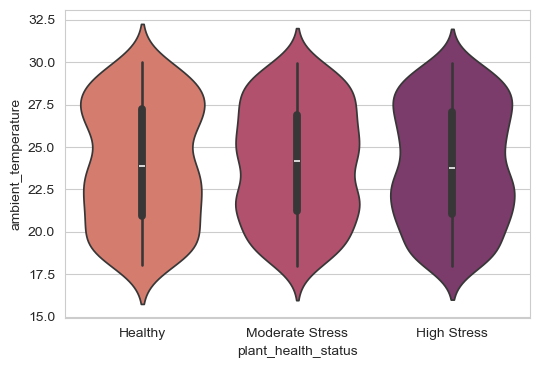

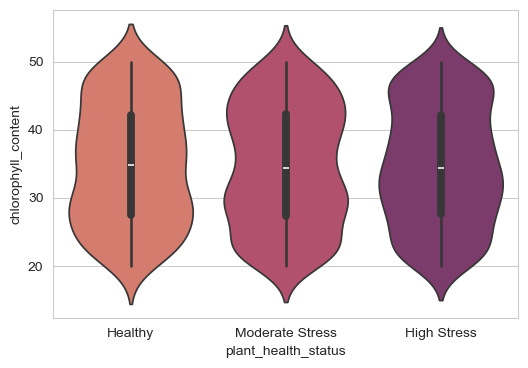

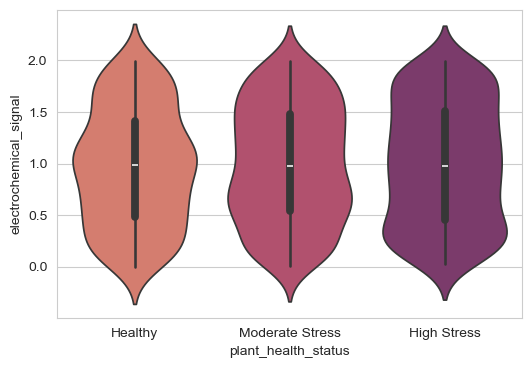

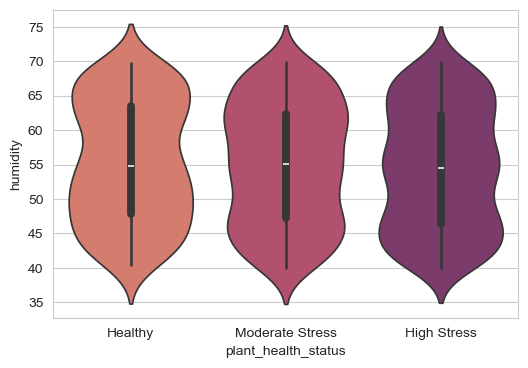

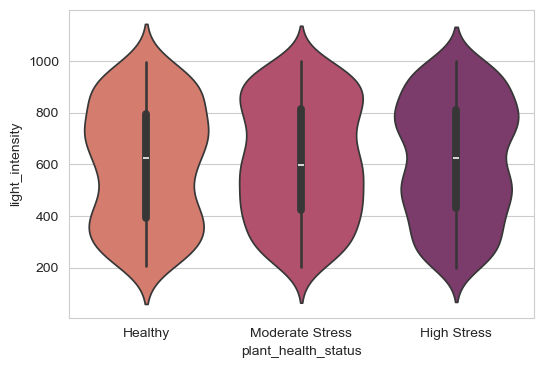

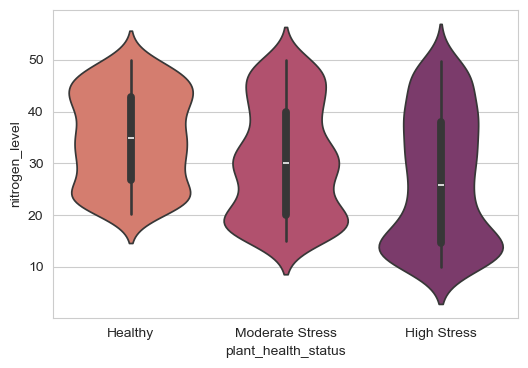

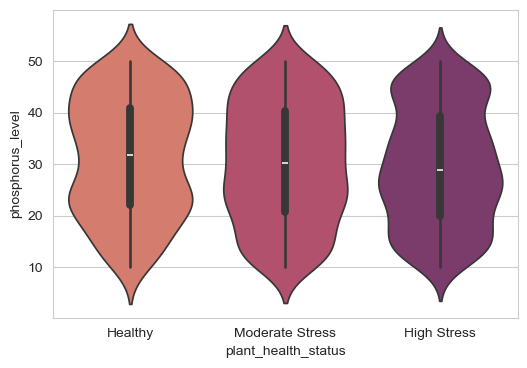

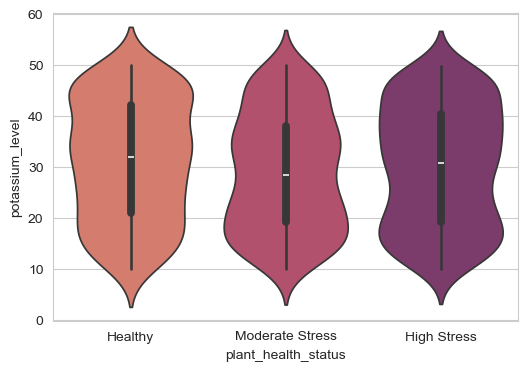

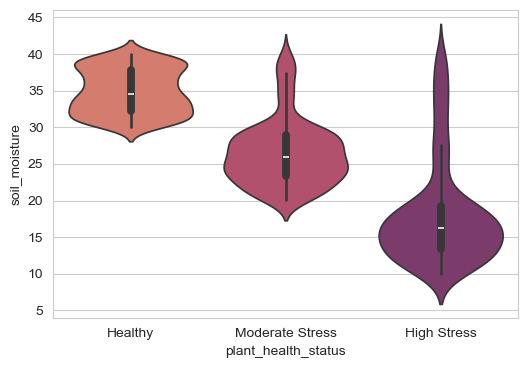

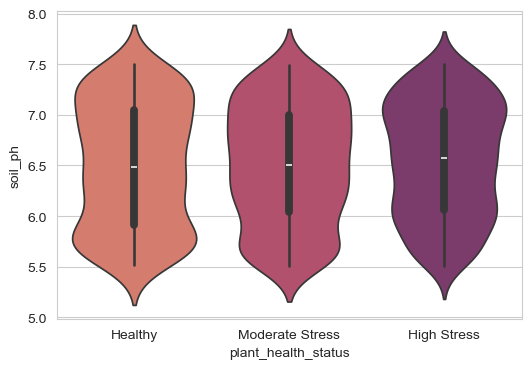

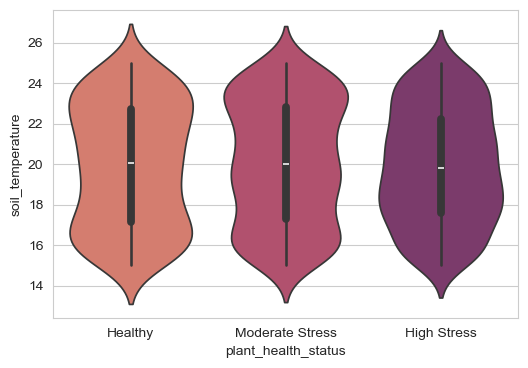

In [12]:
# Violin plot of all features plotted against plant_health_status

y_features = df.columns.difference(['timestamp', 'plant_id','plant_health_status']).to_list()

for y in y_features:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=df, x='plant_health_status', y=y, hue='plant_health_status', palette='flare')
    plt.show()

<Axes: xlabel='plant_health_status', ylabel='soil_moisture'>

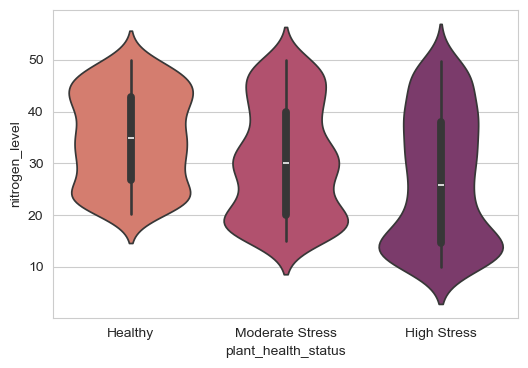

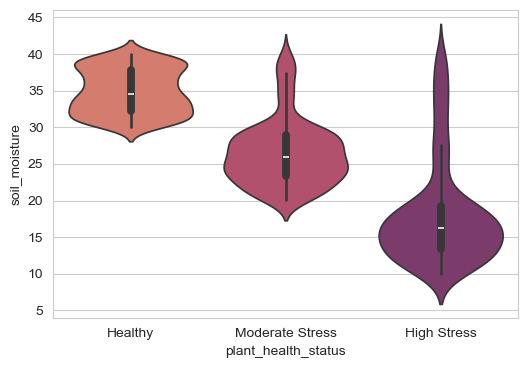

In [13]:
# Two violin plots of interest
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x = 'plant_health_status', y = 'nitrogen_level', hue='plant_health_status', palette='flare')
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x = 'plant_health_status', y = 'soil_moisture', hue='plant_health_status', palette='flare')

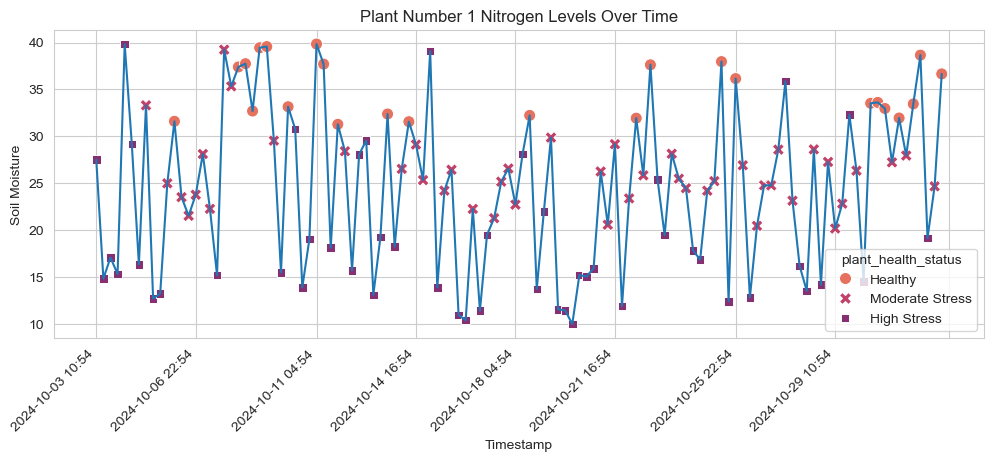

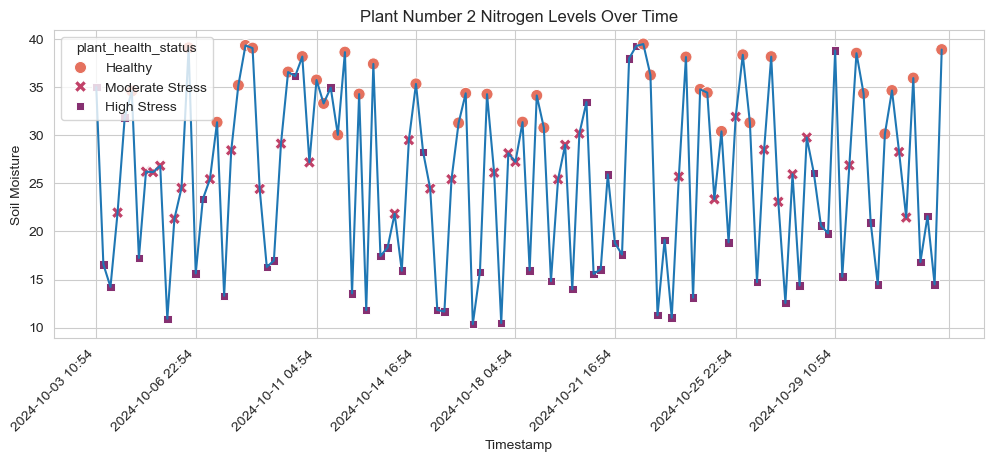

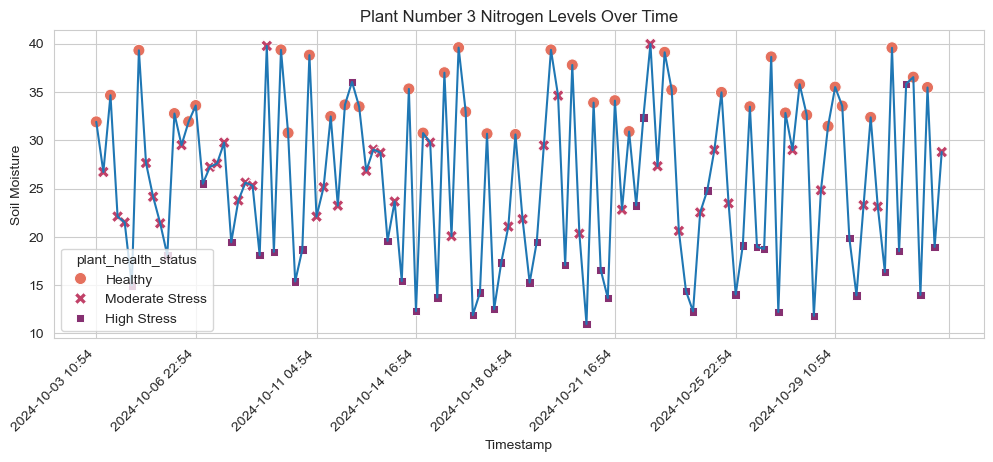

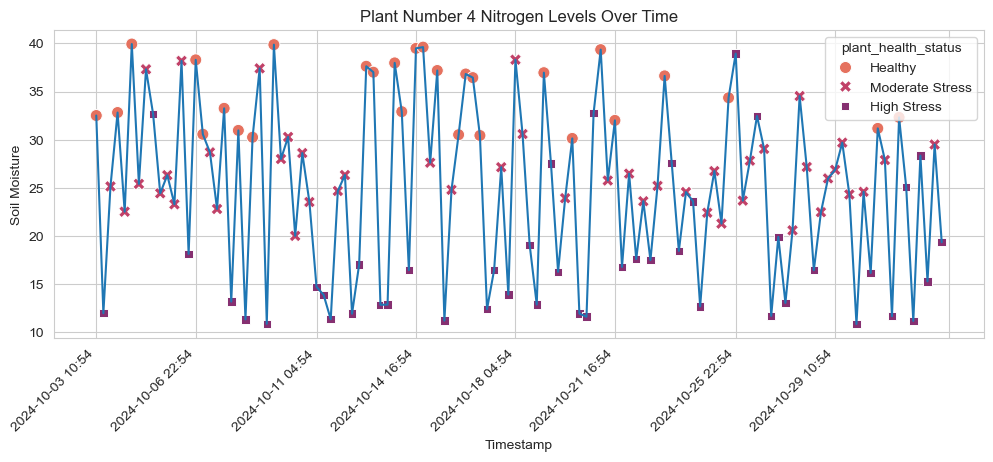

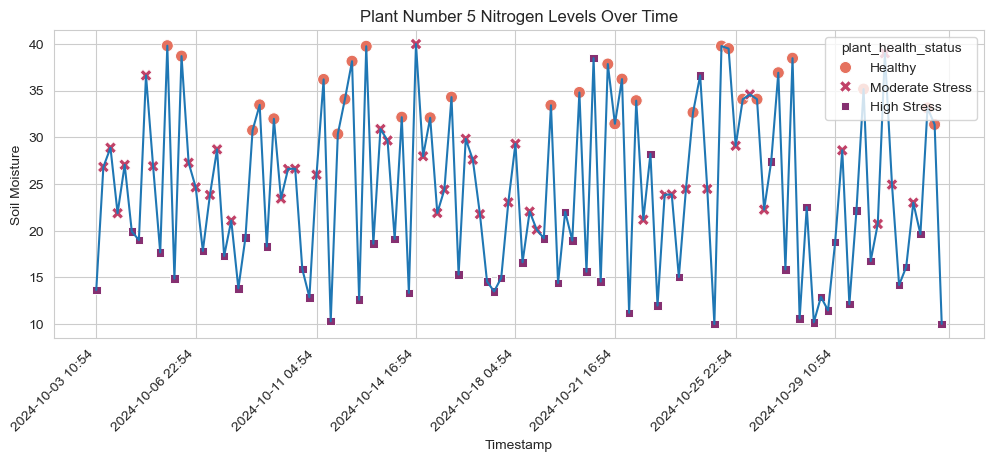

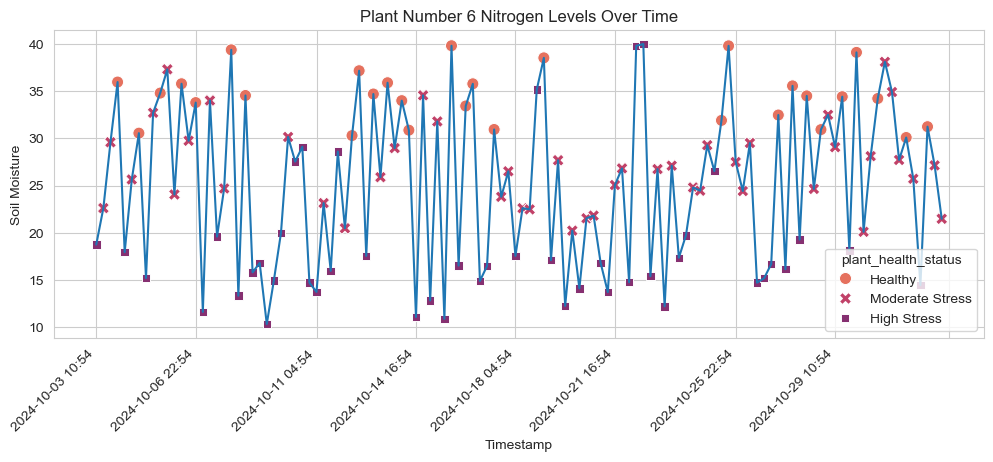

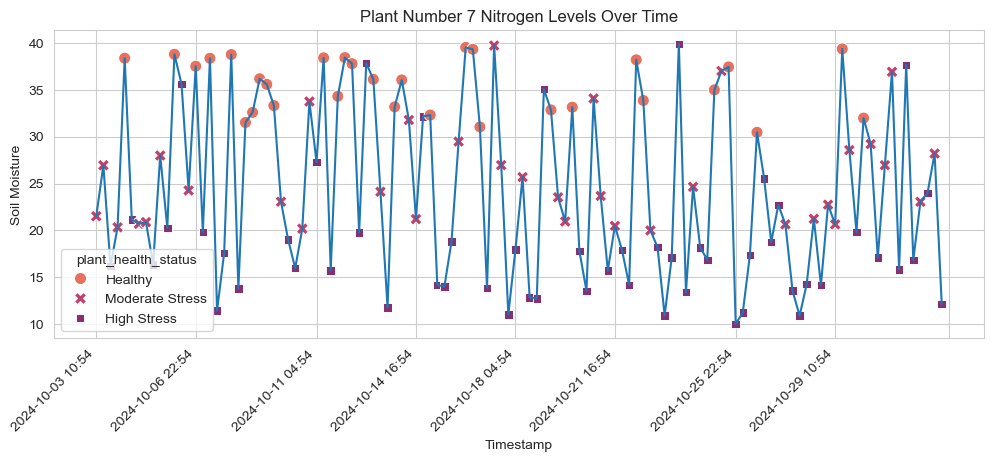

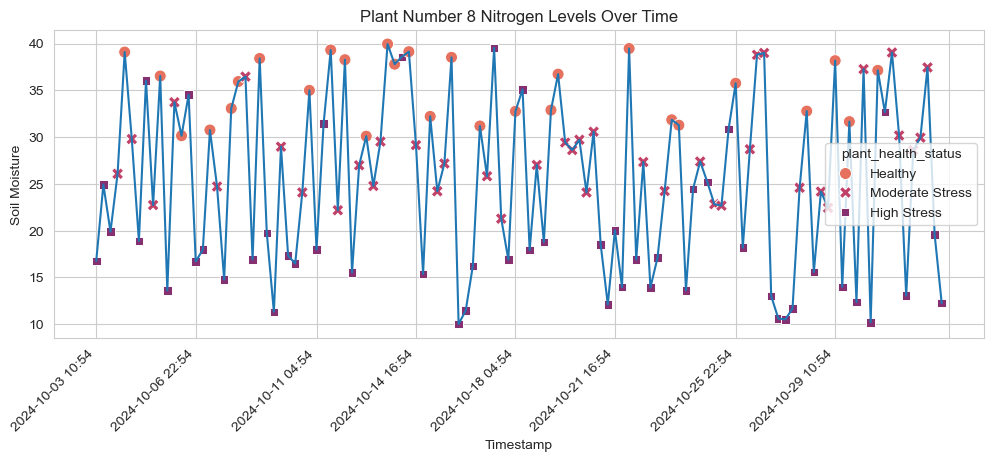

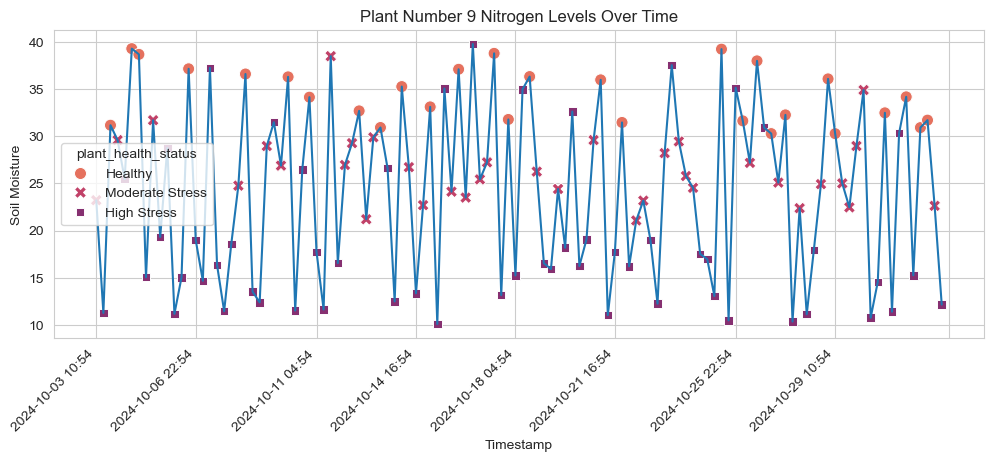

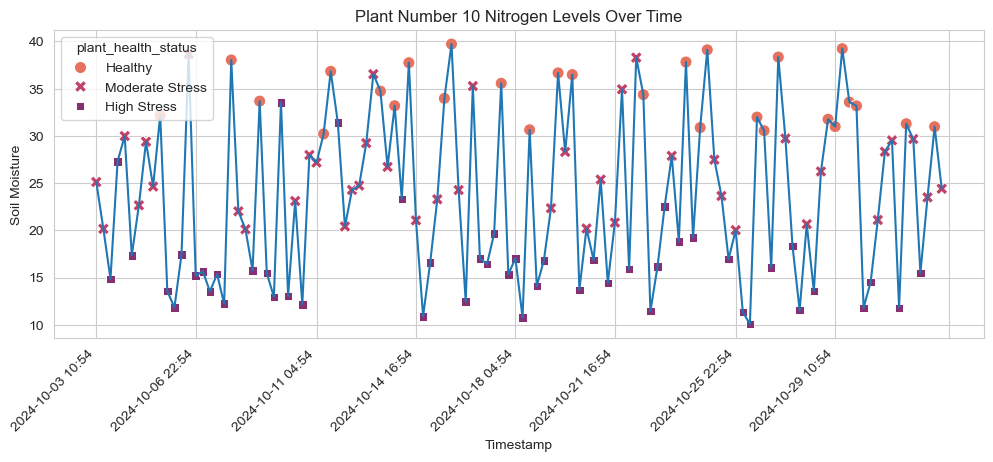

In [14]:
# Plot soil moisture levels over time by plant_id

plant_numbers = df['plant_id'].unique()

for num in plant_numbers:
    df_num = df[df['plant_id'] == num]
    plt.figure(figsize=(12,4))
    sns.lineplot(data = df_num, x = 'timestamp', y = 'soil_moisture')
    ax = sns.scatterplot(data = df_num, x = 'timestamp', y = 'soil_moisture', hue='plant_health_status', palette='flare', s=75, style='plant_health_status')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=12))
    plt.xticks(rotation=45, ha = 'right')
    plt.title(f'Plant Number {num} Nitrogen Levels Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Soil Moisture')
    plt.show()

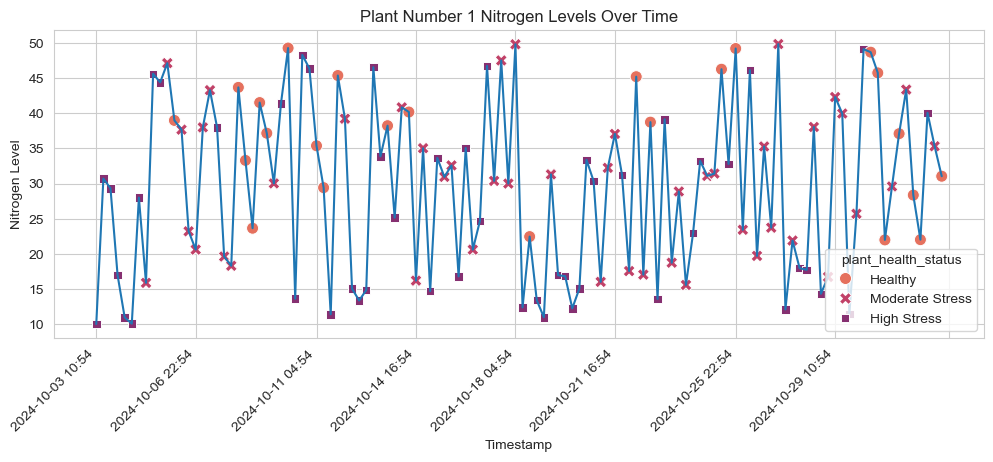

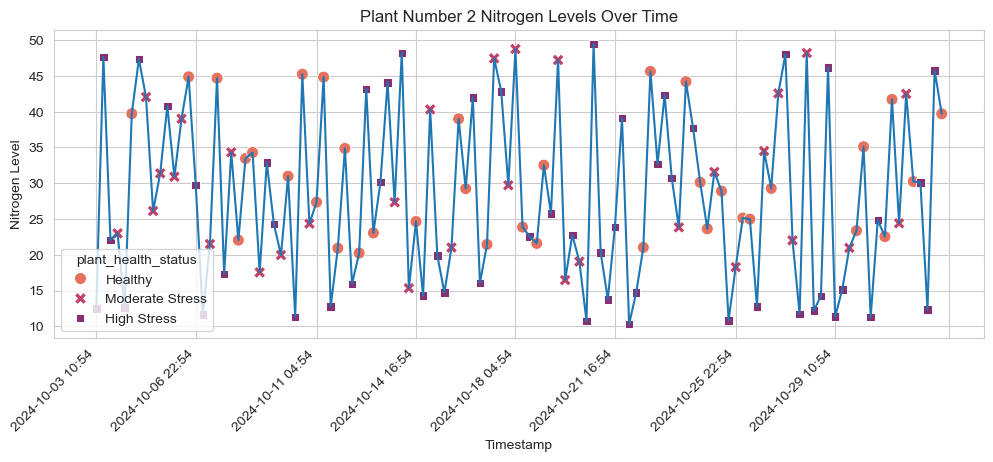

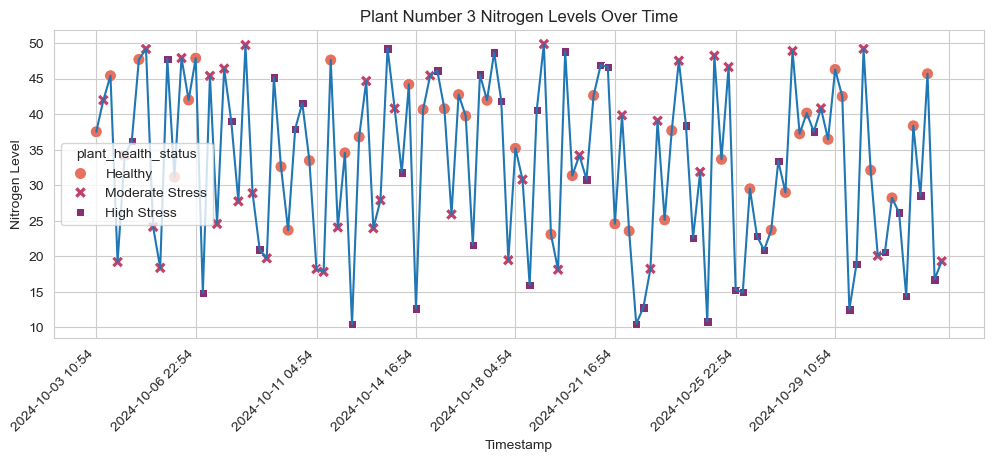

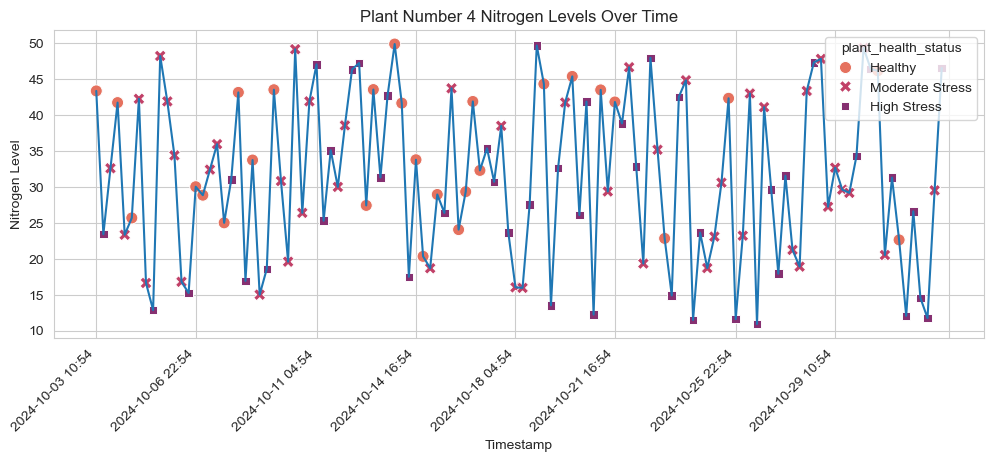

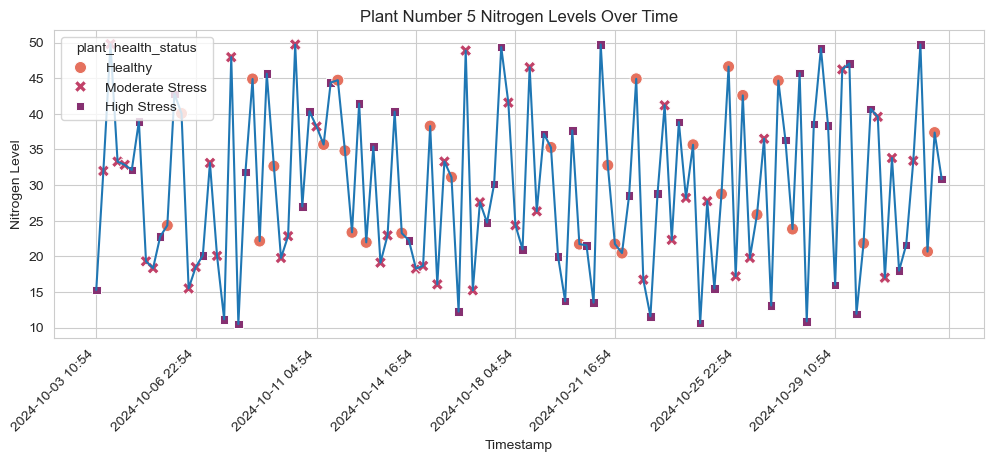

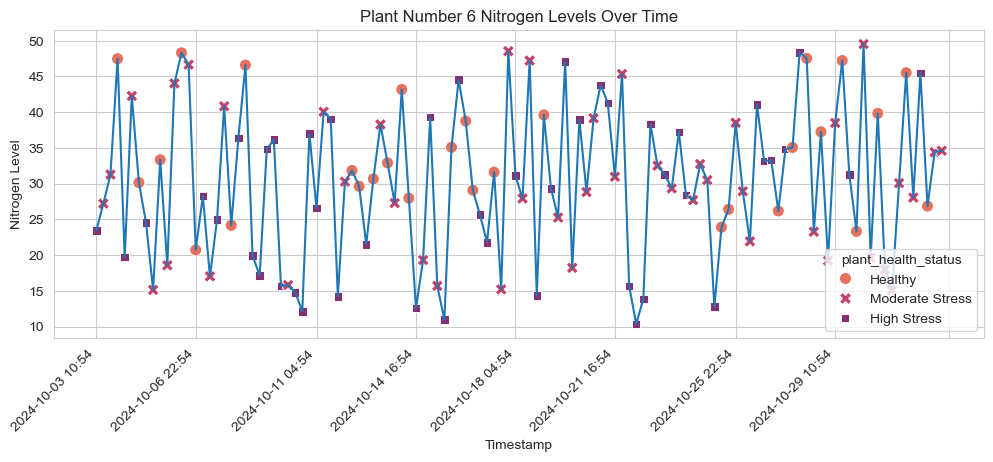

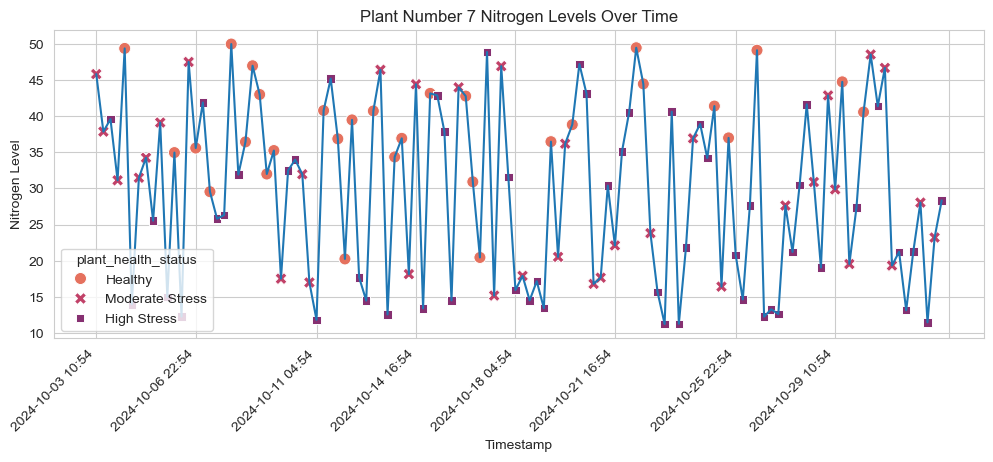

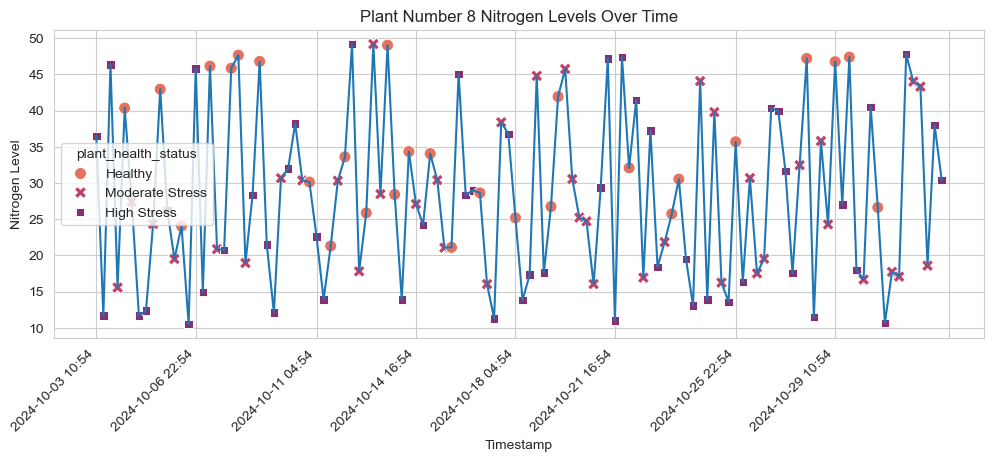

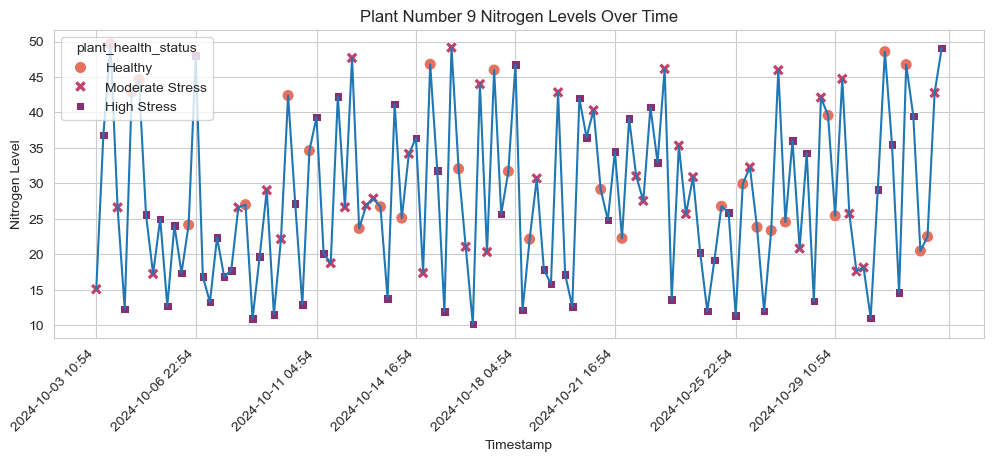

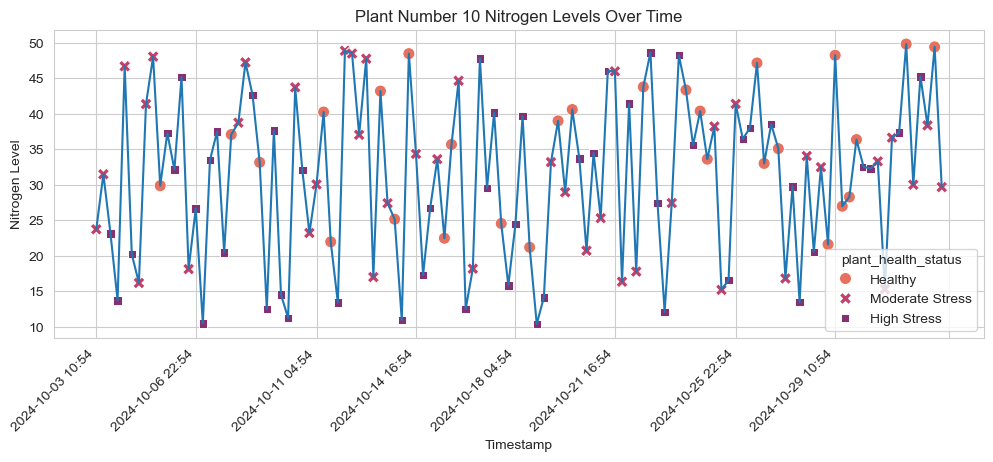

In [15]:
# Plot nitrogen levels over time by plant_id

plant_numbers = df['plant_id'].unique()

for num in plant_numbers:
    df_num = df[df['plant_id'] == num]
    plt.figure(figsize=(12,4))
    sns.lineplot(data = df_num, x = 'timestamp', y = 'nitrogen_level')
    ax = sns.scatterplot(data = df_num, x = 'timestamp', y = 'nitrogen_level', hue='plant_health_status', palette='flare', s=75, style='plant_health_status')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=12))
    plt.xticks(rotation=45, ha = 'right')
    plt.title(f'Plant Number {num} Nitrogen Levels Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Nitrogen Level')
    plt.show()

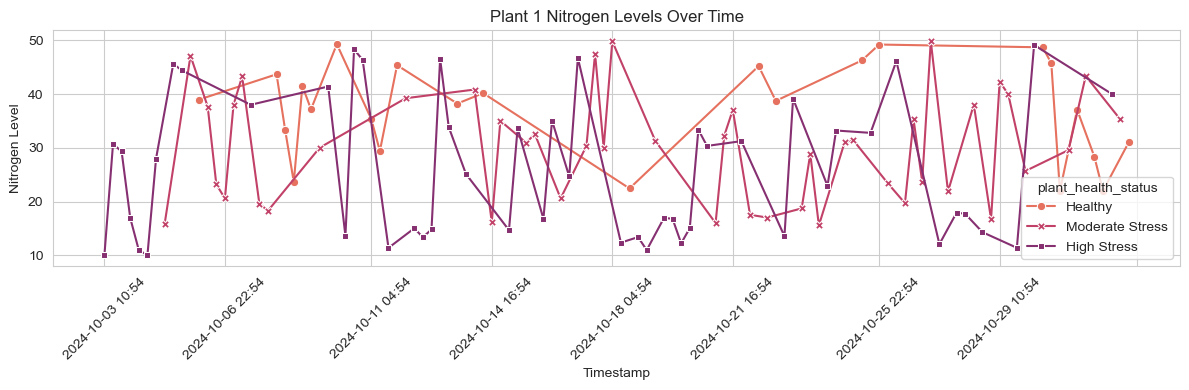

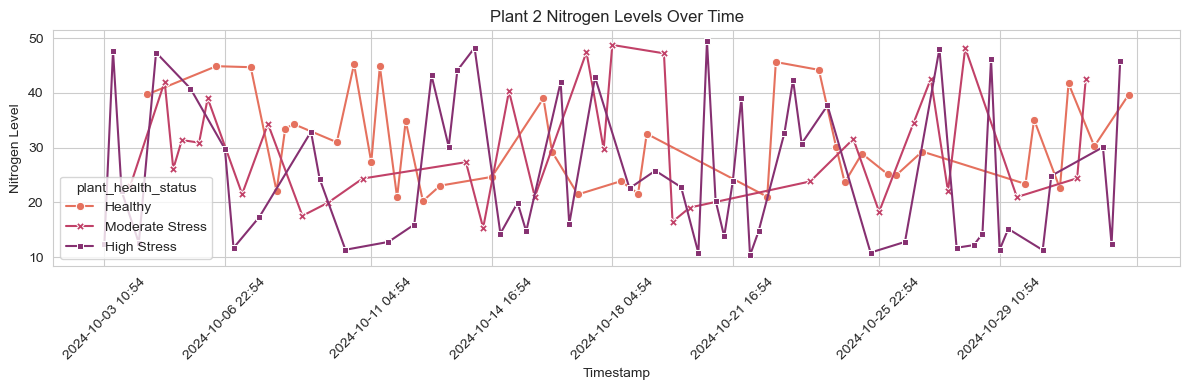

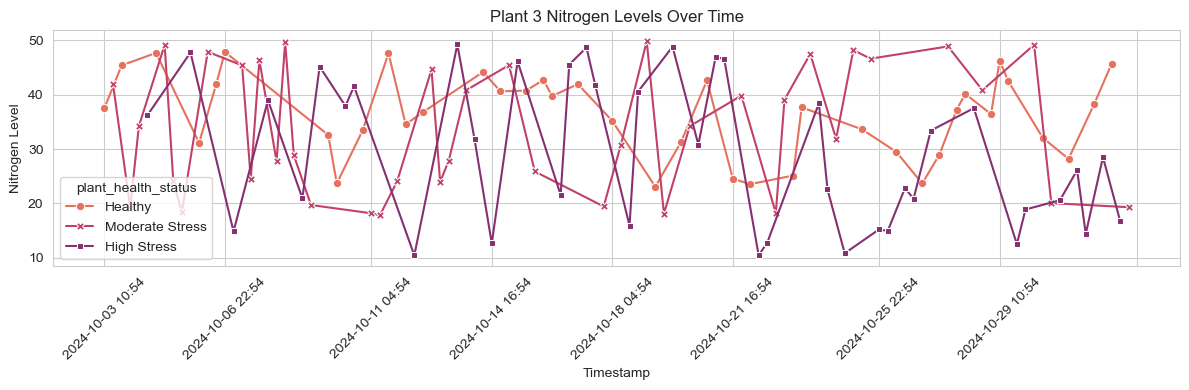

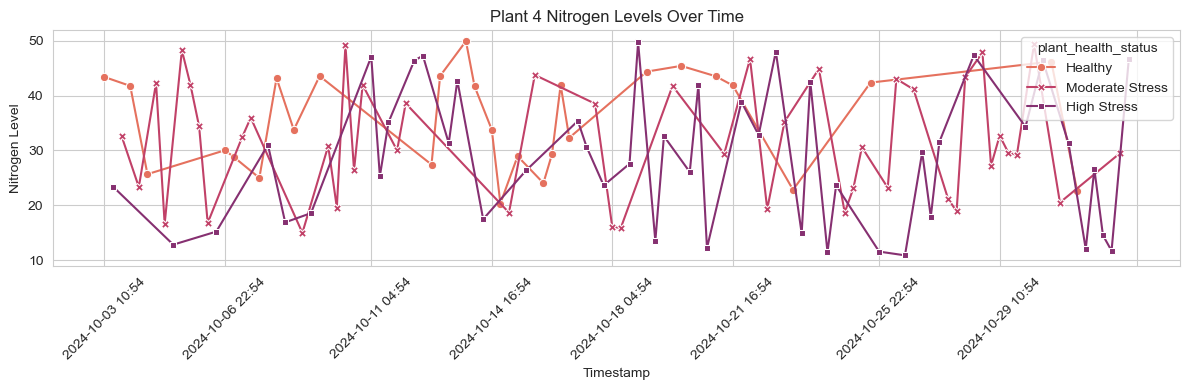

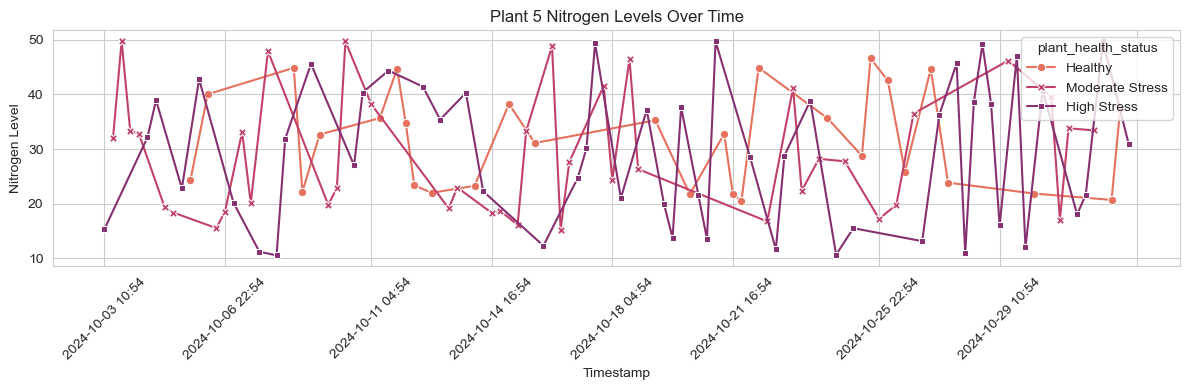

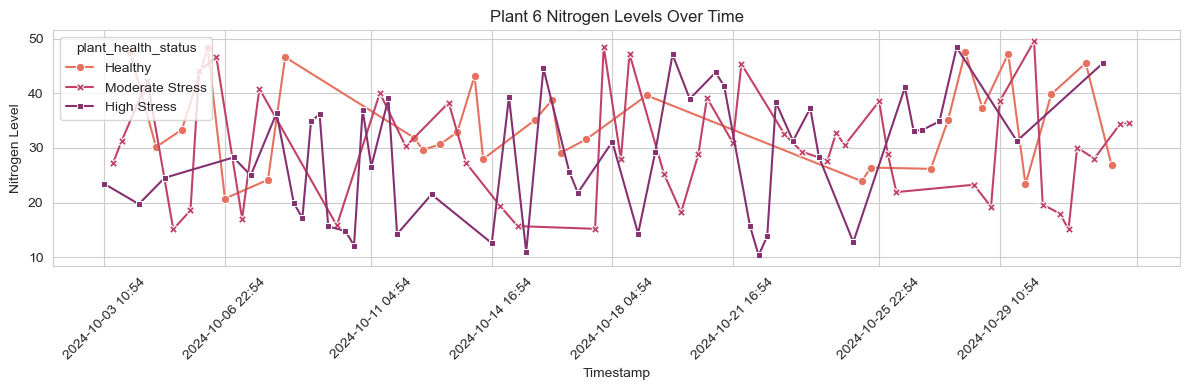

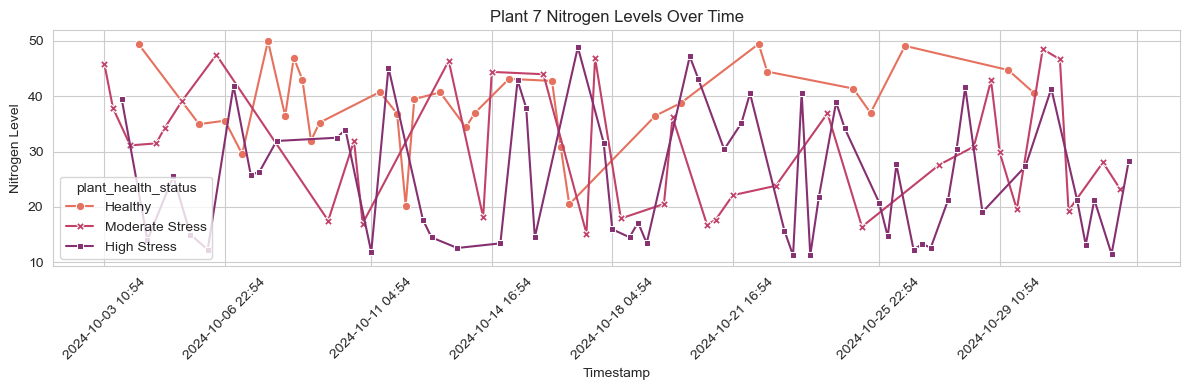

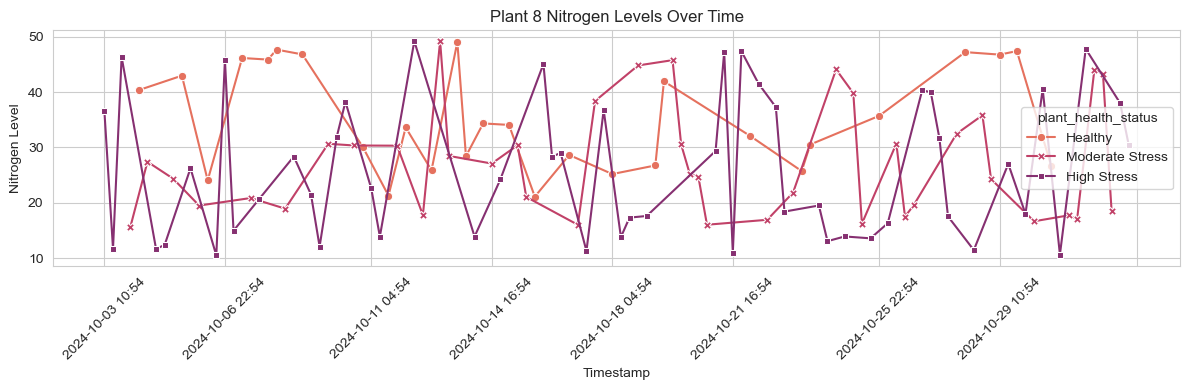

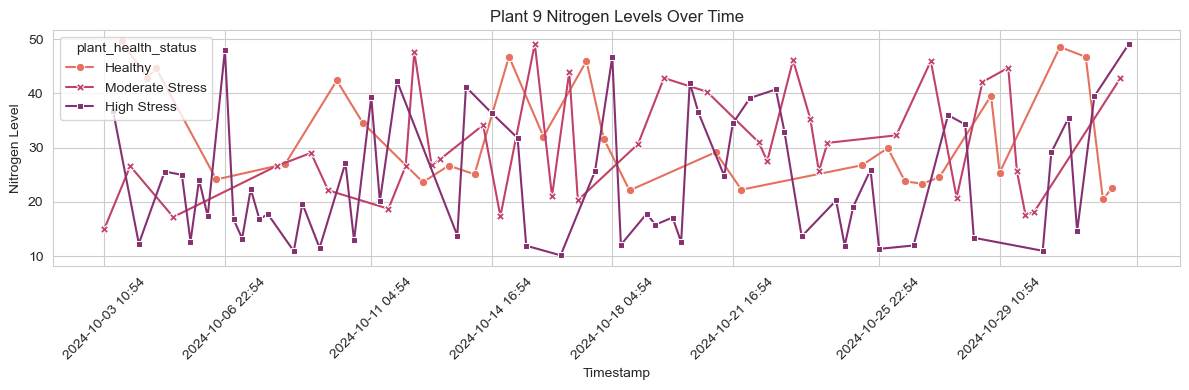

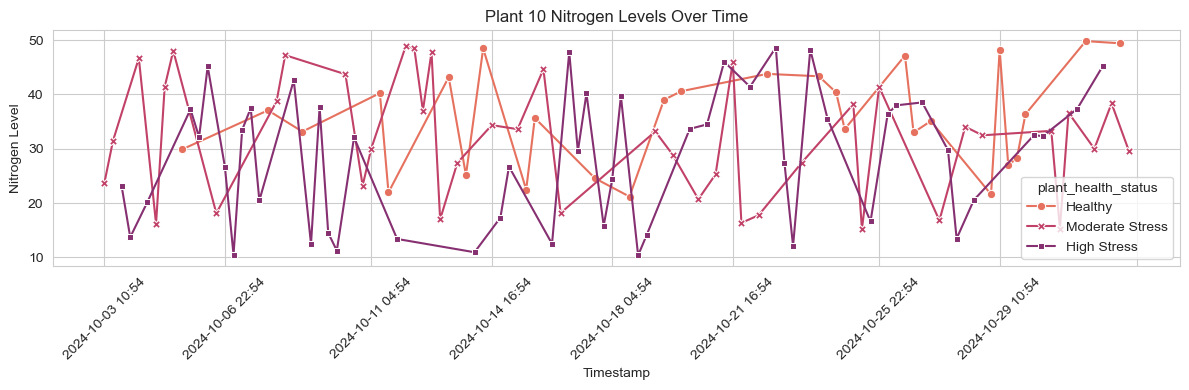

In [16]:
plant_numbers = df['plant_id'].unique()

for num in plant_numbers:
    df_num = df[df['plant_id'] == num]

    plt.figure(figsize=(12,4))

    ax = sns.lineplot(
        data=df_num,
        x='timestamp',
        y='nitrogen_level',
        hue='plant_health_status',
        style='plant_health_status',
        markers=True,
        dashes=False,
        palette='flare'
    )

    # Reduce number of x-axis labels
    ax.xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=12))
    plt.xticks(rotation=45)

    plt.title(f"Plant {num} Nitrogen Levels Over Time")
    plt.ylabel("Nitrogen Level")
    plt.xlabel("Timestamp")
    plt.tight_layout()
    plt.show()

In [17]:
df.head()


timestamp  plant_id  soil_moisture  ambient_temperature  \
0  2024-10-03 10:54         1      27.521109            22.240245   
1  2024-10-03 16:54         1      14.835566            21.706763   
2  2024-10-03 22:54         1      17.086362            21.180946   
3  2024-10-04 04:54         1      15.336156            22.593302   
4  2024-10-04 10:54         1      39.822216            28.929001   

   soil_temperature   humidity  light_intensity   soil_ph  nitrogen_level  \
0         21.900435  55.291904       556.172805  5.581955       10.003650   
1         18.680892  63.949181       596.136721  7.135705       30.712562   
2         15.392939  67.837956       591.124627  5.656852       29.337002   
3         22.778394  58.190811       241.412476  5.584523       16.966621   
4         18.100937  63.772036       444.493830  5.919707       10.944961   

   phosphorus_level  potassium_level  chlorophyll_content  \
0         45.806852        39.076199            35.703006   
1         25.394393        17.944826            27.993296   
2         27.573892        35.706530            43.646308   
3         26.180705        26.257746            37.838095   
4         37.898907        37.654483            48.265812   

   electrochemical_signal plant_health_status  
0                0.941402         High Stress  
1                0.164899         High Stress  
2                1.081728         High Stress  
3                1.186088         High Stress  
4                1.609805         High Stress

In [18]:
# Logistic Regression utilizing scikit-learn

# Establish the features and target variable
feature_cols = ['soil_moisture','ambient_temperature', 'soil_temperature', 'humidity','light_intensity','soil_ph','nitrogen_level','phosphorus_level', 'potassium_level','chlorophyll_content','electrochemical_signal']
X = df[feature_cols]
y = df.plant_health_status

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Instantiate the model
logreg = LogisticRegression(random_state=16, max_iter=10000)

# fit the model with the data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Create the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 66,   0,  14],
       [  2, 114,  19],
       [ 15,  18,  52]])

Text(0.5, 427.9555555555555, 'Predicted plant health')

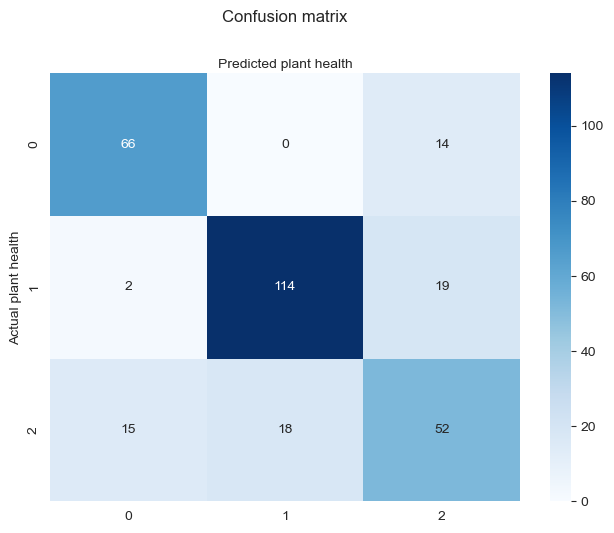

In [19]:
class_names = ['Healthy', 'Moderate_stress','High_stress']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual plant health')
plt.xlabel('Predicted plant health')

In [20]:
print(classification_report(y_test, y_pred, target_names=class_names))

                 precision    recall  f1-score   support

        Healthy       0.80      0.82      0.81        80
Moderate_stress       0.86      0.84      0.85       135
    High_stress       0.61      0.61      0.61        85

       accuracy                           0.77       300
      macro avg       0.76      0.76      0.76       300
   weighted avg       0.77      0.77      0.77       300



In [21]:
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Establish the features and target variable
feature_cols = ['soil_moisture','ambient_temperature', 'soil_temperature', 'humidity','light_intensity','soil_ph','nitrogen_level','phosphorus_level', 'potassium_level','chlorophyll_content','electrochemical_signal']
X = df[feature_cols]
y = df.plant_health_status

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

model_ord = OrderedModel(
    y_train,
    X_train,
    distr='logit'
)

result_ord = model_ord.fit(method='bfgs')
print(result_ord.summary())

Optimization terminated successfully.
         Current function value: 0.532071
         Iterations: 44
         Function evaluations: 51
         Gradient evaluations: 51
                              OrderedModel Results                             
Dep. Variable:     plant_health_status   Log-Likelihood:                -478.86
Model:                    OrderedModel   AIC:                             983.7
Method:             Maximum Likelihood   BIC:                             1046.
Date:                 Wed, 10 Dec 2025                                         
Time:                         21:23:28                                         
No. Observations:                  900                                         
Df Residuals:                      887                                         
Df Model:                           11                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
------------

In [22]:
y_pred_probs = result_ord.predict(X_test)
print(y_pred_probs.head())

             0         1         2
188   0.094496  0.743534  0.161970
662   0.411051  0.560862  0.028087
1132  0.000084  0.004083  0.995833
257   0.078326  0.729859  0.191815
289   0.939181  0.059514  0.001304


In [23]:
# Logistic Regression utilizing scikit-learn using only relevant features

# Establish the features and target variable
feature_cols = ['soil_moisture','nitrogen_level','phosphorus_level']
X = df[feature_cols]
y = df.plant_health_status

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Instantiate the model
logreg = LogisticRegression(random_state=16, max_iter=10000)

# fit the model with the data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# Create the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 67,   0,  13],
       [  2, 111,  22],
       [ 13,  17,  55]])

In [24]:
# Logistic Regression with mord
int_map = {'Healthy':0, 'Moderate Stress':1, 'High Stress':2}
df['int_plant_health_status'] =df['plant_health_status'].map(int_map)
df['int_plant_health_status'] = pd.to_numeric(df['int_plant_health_status'])

import mord as md
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, mean_absolute_error, cohen_kappa_score
from sklearn.model_selection import GridSearchCV

X = df[feature_cols]
y = df.int_plant_health_status

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

pipe = make_pipeline(SimpleImputer(), StandardScaler())
X_train_t = pipe.fit_transform(X_train)
X_test_t = pipe.transform(X_test)

clf = md.LogisticIT()
clf.fit(X_train_t, y_train)
y_pred = clf.predict(X_test_t)

print('acc', accuracy_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))
print('QWK', cohen_kappa_score(y_test, y_pred, weights='quadratic'))

acc 0.7555555555555555
MAE 0.2638888888888889
QWK 0.7647482014388489


In [25]:
def qwk_scorer_func(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

qwk_scorer = make_scorer(qwk_scorer_func, greater_is_better=True)
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

pipe = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('clf', md.LogisticIT()),
])

param_grid = {
    'clf__alpha': [0.001, 0.001, 0.01 , 0.1, 1, 10]
}

grid = GridSearchCV(
    pipe,
    param_grid,
    scoring=qwk_scorer,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print('Best alpha:', grid.best_params_)
print('Best CV QWK:', grid.best_score_)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('QWK:', qwk_scorer_func(y_test, y_pred))

Best alpha: {'clf__alpha': 10}
Best CV QWK: 0.8051094881781651
Accuracy: 0.7611111111111111
MAE: 0.25833333333333336
QWK: 0.7687319884726225


In [26]:
# logrreg, svm, decision tree

from sklearn.preprocessing import StandardScaler

feature_cols = ['soil_moisture','ambient_temperature', 'soil_temperature', 'humidity','light_intensity','soil_ph','nitrogen_level','phosphorus_level', 'potassium_level','chlorophyll_content','electrochemical_signal']

# feature_cols = ['soil_moisture','nitrogen_level','phosphorus_level']

X = df[feature_cols]
y = df.plant_health_status

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.75, random_state=25)

print(f'Train size: {round(len(X_train_scaled) / len(X) * 100)}% \n\ Test size: {round(len(X_test_scaled) / len(X) * 100)}%')


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

logistic_regression = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

logistic_regression.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
tree.fit(X_train_scaled, y_train)

log_reg_preds = logistic_regression.predict(X_test_scaled)
svm_preds = svm.predict(X_test_scaled)
tree_preds = tree.predict(X_test_scaled)

from sklearn.metrics import classification_report

model_preds = {
    'Logistic Regression': log_reg_preds,
    'SVM': svm_preds,
    'Decision Tree': tree_preds
}

for model, preds in model_preds.items():
    print(f'{model} Results:\n{classification_report(y_test, preds)}', sep='\n\n')

Train size: 75% 
\ Test size: 25%
Logistic Regression Results:
                 precision    recall  f1-score   support

        Healthy       0.80      0.81      0.81        75
    High Stress       0.78      0.79      0.78       119
Moderate Stress       0.67      0.65      0.66       106

       accuracy                           0.75       300
      macro avg       0.75      0.75      0.75       300
   weighted avg       0.75      0.75      0.75       300

SVM Results:
                 precision    recall  f1-score   support

        Healthy       0.84      0.87      0.86        75
    High Stress       0.87      0.86      0.86       119
Moderate Stress       0.76      0.76      0.76       106

       accuracy                           0.83       300
      macro avg       0.83      0.83      0.83       300
   weighted avg       0.83      0.83      0.83       300

Decision Tree Results:
                 precision    recall  f1-score   support

        Healthy       1.00      1.00   

In [27]:
print(X.columns)


Index(['soil_moisture', 'ambient_temperature', 'soil_temperature', 'humidity',
       'light_intensity', 'soil_ph', 'nitrogen_level', 'phosphorus_level',
       'potassium_level', 'chlorophyll_content', 'electrochemical_signal'],
      dtype='object')


In [28]:
# RFE and logistic regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=25)

# Pipeline with scaling + RFE + model
logreg_rfe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)),
    ('clf', LogisticRegression(max_iter=1000))
])

logreg_rfe.fit(X_train, y_train)
logreg_preds = logreg_rfe.predict(X_test)

print("Logistic Regression + RFE Results:")
print(classification_report(y_test, logreg_preds))

# See which features were selected
selected = X.columns[logreg_rfe.named_steps['rfe'].support_]
print("Selected features:", list(selected))

Logistic Regression + RFE Results:
                 precision    recall  f1-score   support

        Healthy       0.83      0.85      0.84        93
    High Stress       0.76      0.79      0.77       136
Moderate Stress       0.70      0.66      0.68       131

       accuracy                           0.76       360
      macro avg       0.76      0.77      0.77       360
   weighted avg       0.76      0.76      0.76       360

Selected features: ['soil_moisture', 'soil_temperature', 'nitrogen_level', 'phosphorus_level', 'potassium_level']


In [29]:
# RFE SVM

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=25)

# Pipeline with scaling + RFE + model
logreg_rfe = Pipeline([
    ('scaler', StandardScaler()),
    ('rfe', RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)),
    ('clf', LogisticRegression(max_iter=1000))
])

logreg_rfe.fit(X_train, y_train)
logreg_preds = logreg_rfe.predict(X_test)

print("Logistic Regression + RFE Results:")
print(classification_report(y_test, logreg_preds))

# See which features were selected
selected = X.columns[logreg_rfe.named_steps['rfe'].support_]
print("Selected features:", list(selected))

Logistic Regression + RFE Results:
                 precision    recall  f1-score   support

        Healthy       0.83      0.85      0.84        93
    High Stress       0.76      0.79      0.77       136
Moderate Stress       0.70      0.66      0.68       131

       accuracy                           0.76       360
      macro avg       0.76      0.77      0.77       360
   weighted avg       0.76      0.76      0.76       360

Selected features: ['soil_moisture', 'soil_temperature', 'nitrogen_level', 'phosphorus_level', 'potassium_level']


In [30]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

feature_cols = ['soil_moisture','ambient_temperature', 'soil_temperature', 'humidity','light_intensity','soil_ph','nitrogen_level','phosphorus_level', 'potassium_level','chlorophyll_content','electrochemical_signal']

#feature_cols = ['soil_moisture','nitrogen_level','phosphorus_level']

X = df[feature_cols]
y = df.plant_health_status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)

Accuracy: 0.5416666666666666


<Axes: >

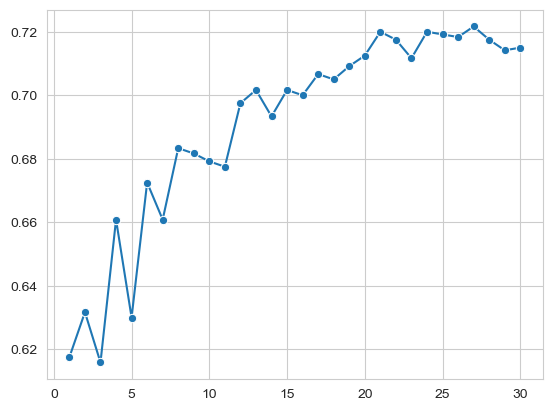

In [31]:
# KNN cross_validation

from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))


sns.lineplot(x=k_values, y=scores, marker = 'o')

In [32]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.49166666666666664
Precision: 0.4551362123881208
Recall: 0.4606598194833489


In [33]:
# RFE for KNN

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 1. RFE using Logistic Regression
selector = RFE(LogisticRegression(max_iter=200), n_features_to_select=3)
selector.fit(X, y)

# 2. Transform X using selected features
X_rfe = selector.transform(X)

# 3. Train KNN on selected features
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_rfe, y_train)
y_pred = knn.predict(X_test_rfe)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9083333333333333
Precision: 0.9018212348830036
Recall: 0.9109772160802883


In [34]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

# Features and target
feature_cols = ['soil_moisture','ambient_temperature','soil_temperature','humidity',
                'light_intensity','soil_ph','nitrogen_level','phosphorus_level',
                'potassium_level','chlorophyll_content','electrochemical_signal']
X = df[feature_cols]
y = df['plant_health_status']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose estimator
estimator = LogisticRegression(max_iter=10000)

# Test different numbers of features
results = []
for n_features in range(1, len(feature_cols)+1):
    rfe = RFE(estimator, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X_scaled, y)

    cv_scores = cross_val_score(estimator, X_rfe, y, cv=5)
    mean_score = cv_scores.mean()

    selected_features = np.array(feature_cols)[rfe.support_]
    results.append({
        'n_features': n_features,
        'mean_cv_accuracy': mean_score,
        'selected_features': selected_features
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find best number of features
best_row = results_df.loc[results_df['mean_cv_accuracy'].idxmax()]
print(f"Best number of features: {best_row['n_features']}")
print(f"Cross-validated accuracy: {best_row['mean_cv_accuracy']:.3f}")
print(f"Selected features: {best_row['selected_features']}")

Best number of features: 2
Cross-validated accuracy: 0.769
Selected features: ['soil_moisture' 'nitrogen_level']


In [35]:
# Features and target
feature_cols = ['soil_moisture','ambient_temperature','soil_temperature','humidity',
                'light_intensity','soil_ph','nitrogen_level','phosphorus_level',
                'potassium_level','chlorophyll_content','electrochemical_signal']
X = df[feature_cols]
y = df['plant_health_status']

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Instantiate Logistic Regression
logreg = LogisticRegression(max_iter=10000)

# Test numbers of features using a for loop and RFE
results = []
for n in range(1, 12):
    rfe = RFE(logreg, n_features_to_select=n)
    X_rfe = rfe.fit_transform(X_scaled, y)

    cv_scores = cross_val_score(logreg, X_rfe, y, cv=5)
    mean_score = cv_scores.mean()

    selected_features = np.array(feature_cols)[rfe.support_]
    results.append({
        'n':n,
        'mean': mean_score,
        'selected_features': selected_features
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='mean', ascending=False))



     n      mean                                  selected_features
1    2  0.769167                    [soil_moisture, nitrogen_level]
3    4  0.764167  [soil_moisture, soil_temperature, nitrogen_lev...
4    5  0.763333  [soil_moisture, ambient_temperature, soil_temp...
5    6  0.760000  [soil_moisture, ambient_temperature, soil_temp...
8    9  0.759167  [soil_moisture, ambient_temperature, soil_temp...
2    3  0.758333  [soil_moisture, soil_temperature, nitrogen_level]
6    7  0.756667  [soil_moisture, ambient_temperature, soil_temp...
9   10  0.755000  [soil_moisture, ambient_temperature, soil_temp...
7    8  0.755000  [soil_moisture, ambient_temperature, soil_temp...
10  11  0.753333  [soil_moisture, ambient_temperature, soil_temp...
0    1  0.748333                                    [soil_moisture]
